In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [59]:
import itertools

import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(41)

states = ["TN", "CA", "SC", "AL", "AK"]

df = pd.DataFrame(
    {
        "current_state": np.random.choice(states, 10),
        "prev_state": np.random.choice(states, 10),
    }
)

df = pd.get_dummies(df)
print(df.shape)
df

(10, 10)


,current_state_AK,current_state_AL,current_state_CA,current_state_SC,current_state_TN,prev_state_AK,prev_state_AL,prev_state_CA,prev_state_SC,prev_state_TN
0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,1
5,0,0,1,0,0,1,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0
8,0,0,0,1,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [69]:
def df_dist(df, metric):
    """Get pdist as a square distance matrix in dataframe format and preserved indices"""
    dist_df = pd.DataFrame(squareform(pdist(df, metric)))
    dist_df.index = df.index
    dist_df.columns = df.index

    return dist_df

<IPython.core.display.Javascript object>

In [46]:
def tall_dist(df, metric="euclidean"):
    """Get pdist upper tri as a tall dataframe"""
    dists = pdist(df, metric)
    rows = []
    for i, (a, b) in enumerate(itertools.combinations(df.index, 2)):
        row = {"a": a, "b": b, "dist": dists[i]}
        rows.append(row)

    return pd.DataFrame(rows)

<IPython.core.display.Javascript object>

,hamming,jaccard,dice,pair
0,0.4,1,1,0 <---> 1
1,0.4,1,1,0 <---> 2
2,0.4,1,1,0 <---> 3
3,0,0,0,0 <---> 4
4,0.4,1,1,0 <---> 5
5,0.4,1,1,0 <---> 6
6,0.4,1,1,0 <---> 7
7,0.4,1,1,0 <---> 8
8,0.2,0.666667,0.5,0 <---> 9
9,0.2,0.666667,0.5,1 <---> 2


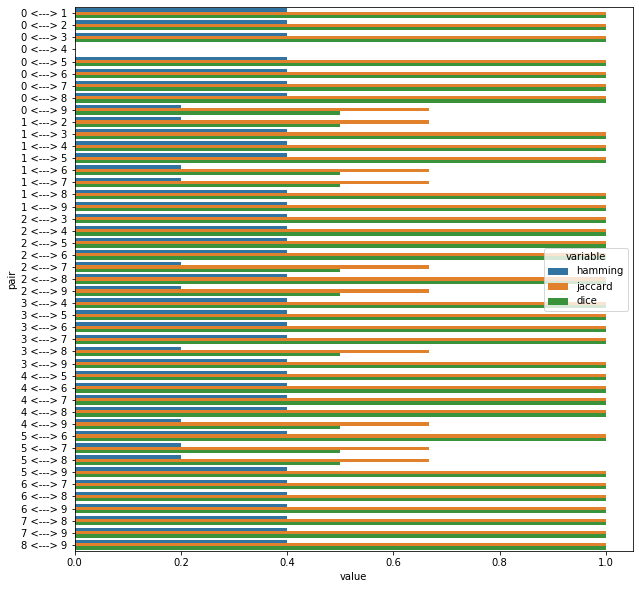

<IPython.core.display.Javascript object>

In [68]:
ham_df = tall_dist(df, "hamming")
jac_df = tall_dist(df, "jaccard")
dic_df = tall_dist(df, "dice")

dist_df = ham_df.copy()
dist_df = dist_df.rename(columns={"dist": "hamming"})
dist_df["jaccard"] = jac_df["dist"]
dist_df["dice"] = dic_df["dist"]

dist_df["pair"] = dist_df["a"].astype(str) + " <---> " + dist_df["b"].astype(str)
dist_df = dist_df.drop(columns=["a", "b"])

# Display with coloring by row
display(dist_df.style.background_gradient(axis=1))

# Display as bars
tall_dist_df = pd.melt(dist_df, id_vars="pair")
plt.figure(figsize=(10, 10))
sns.barplot("value", "pair", hue="variable", data=tall_dist_df)
plt.show()

In [23]:
df_dist(df, "jaccard")

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.750000,0.571429,0.714286,0.750000,0.625000,0.625000,0.625000,0.750000,0.833333
1,0.750000,0.000000,0.888889,0.714286,0.333333,0.625000,0.777778,0.625000,0.750000,0.833333
2,0.571429,0.888889,0.000000,0.714286,0.750000,0.777778,0.625000,0.777778,0.750000,0.833333
3,0.714286,0.714286,0.714286,0.000000,0.714286,0.571429,0.888889,0.750000,0.875000,1.000000
4,0.750000,0.333333,0.750000,0.714286,0.000000,0.625000,0.777778,0.428571,0.750000,0.833333
5,0.625000,0.625000,0.777778,0.571429,0.625000,0.000000,0.666667,0.500000,0.625000,0.857143
6,0.625000,0.777778,0.625000,0.888889,0.777778,0.666667,0.000000,0.500000,0.166667,0.857143
7,0.625000,0.625000,0.777778,0.750000,0.428571,0.500000,0.500000,0.000000,0.428571,0.666667
8,0.750000,0.750000,0.750000,0.875000,0.750000,0.625000,0.166667,0.428571,0.000000,0.833333
9,0.833333,0.833333,0.833333,1.000000,0.833333,0.857143,0.857143,0.666667,0.833333,0.000000


<IPython.core.display.Javascript object>

In [22]:
df_dist(df, "dice")

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.600000,0.400000,0.555556,0.600000,0.454545,0.454545,0.454545,0.600000,0.714286
1,0.600000,0.000000,0.800000,0.555556,0.200000,0.454545,0.636364,0.454545,0.600000,0.714286
2,0.400000,0.800000,0.000000,0.555556,0.600000,0.636364,0.454545,0.636364,0.600000,0.714286
3,0.555556,0.555556,0.555556,0.000000,0.555556,0.400000,0.800000,0.600000,0.777778,1.000000
4,0.600000,0.200000,0.600000,0.555556,0.000000,0.454545,0.636364,0.272727,0.600000,0.714286
5,0.454545,0.454545,0.636364,0.400000,0.454545,0.000000,0.500000,0.333333,0.454545,0.750000
6,0.454545,0.636364,0.454545,0.800000,0.636364,0.500000,0.000000,0.333333,0.090909,0.750000
7,0.454545,0.454545,0.636364,0.600000,0.272727,0.333333,0.333333,0.000000,0.272727,0.500000
8,0.600000,0.600000,0.600000,0.777778,0.600000,0.454545,0.090909,0.272727,0.000000,0.714286
9,0.714286,0.714286,0.714286,1.000000,0.714286,0.750000,0.750000,0.500000,0.714286,0.000000


<IPython.core.display.Javascript object>

In [25]:
data = np.random.choice([0, 1], 100).reshape((10, 10))
df = pd.DataFrame(data, columns=[f"q{i + 1}" for i in range(10)])
print(df.shape)
df

(10, 10)


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,0,1,1,1,0,1,1,1,1,1
1,0,0,1,0,0,1,0,1,0,1
2,1,0,1,0,1,1,0,1,1,0
3,1,1,0,0,1,0,1,1,1,0
4,0,0,0,1,1,0,0,1,1,1
5,0,1,1,1,0,0,0,1,0,0
6,1,0,1,1,1,0,1,1,1,0
7,0,1,1,1,0,0,1,1,0,0
8,0,1,1,1,1,0,1,1,1,0
9,1,0,0,0,0,0,1,1,0,0


<IPython.core.display.Javascript object>

In [27]:
squareform(pdist(df, metric="hamming"))

array([[0. , 0.4, 0.6, 0.6, 0.5, 0.4, 0.5, 0.3, 0.3, 0.7],
       [0.4, 0. , 0.4, 0.8, 0.5, 0.4, 0.7, 0.5, 0.7, 0.5],
       [0.6, 0.4, 0. , 0.4, 0.5, 0.6, 0.3, 0.7, 0.5, 0.5],
       [0.6, 0.8, 0.4, 0. , 0.5, 0.6, 0.3, 0.5, 0.3, 0.3],
       [0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0.4, 0.6, 0.4, 0.6],
       [0.4, 0.4, 0.6, 0.6, 0.5, 0. , 0.5, 0.1, 0.3, 0.5],
       [0.5, 0.7, 0.3, 0.3, 0.4, 0.5, 0. , 0.4, 0.2, 0.4],
       [0.3, 0.5, 0.7, 0.5, 0.6, 0.1, 0.4, 0. , 0.2, 0.4],
       [0.3, 0.7, 0.5, 0.3, 0.4, 0.3, 0.2, 0.2, 0. , 0.6],
       [0.7, 0.5, 0.5, 0.3, 0.6, 0.5, 0.4, 0.4, 0.6, 0. ]])

<IPython.core.display.Javascript object>

In [30]:
squareform(pdist(df, metric="jaccard")).round(1)

array([[0. , 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.4, 0.3, 0.8],
       [0.5, 0. , 0.6, 0.9, 0.7, 0.7, 0.8, 0.7, 0.8, 0.8],
       [0.6, 0.6, 0. , 0.5, 0.6, 0.8, 0.4, 0.8, 0.6, 0.7],
       [0.6, 0.9, 0.5, 0. , 0.6, 0.8, 0.4, 0.6, 0.4, 0.5],
       [0.6, 0.7, 0.6, 0.6, 0. , 0.7, 0.5, 0.8, 0.5, 0.9],
       [0.5, 0.7, 0.8, 0.8, 0.7, 0. , 0.6, 0.2, 0.4, 0.8],
       [0.5, 0.8, 0.4, 0.4, 0.5, 0.6, 0. , 0.5, 0.2, 0.6],
       [0.4, 0.7, 0.8, 0.6, 0.8, 0.2, 0.5, 0. , 0.3, 0.7],
       [0.3, 0.8, 0.6, 0.4, 0.5, 0.4, 0.2, 0.3, 0. , 0.8],
       [0.8, 0.8, 0.7, 0.5, 0.9, 0.8, 0.6, 0.7, 0.8, 0. ]])

<IPython.core.display.Javascript object>

In [31]:
squareform(pdist(df, metric="dice")).round(1)

array([[0. , 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.6],
       [0.3, 0. , 0.4, 0.8, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7],
       [0.4, 0.4, 0. , 0.3, 0.5, 0.6, 0.2, 0.6, 0.4, 0.6],
       [0.4, 0.8, 0.3, 0. , 0.5, 0.6, 0.2, 0.5, 0.2, 0.3],
       [0.4, 0.6, 0.5, 0.5, 0. , 0.6, 0.3, 0.6, 0.3, 0.8],
       [0.3, 0.5, 0.6, 0.6, 0.6, 0. , 0.5, 0.1, 0.3, 0.7],
       [0.3, 0.6, 0.2, 0.2, 0.3, 0.5, 0. , 0.3, 0.1, 0.4],
       [0.2, 0.6, 0.6, 0.5, 0.6, 0.1, 0.3, 0. , 0.2, 0.5],
       [0.2, 0.6, 0.4, 0.2, 0.3, 0.3, 0.1, 0.2, 0. , 0.6],
       [0.6, 0.7, 0.6, 0.3, 0.8, 0.7, 0.4, 0.5, 0.6, 0. ]])

<IPython.core.display.Javascript object>